<h1> Southern Water Corp</h1>


<b>Used Microsoft Excel's data analytics capabilities to analyze Southern Water Corp's Pump Data.




<img src = 'https://www.sdcwa.org/wp-content/uploads/2020/10/Seawater-Desalination.jpg'>

---

In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

---------------------------------------------------------------------------

In [43]:
# i. Import the pandas library
import pandas as pd

# ii. Import each of the two data sources and store them into their individual dataframes
dataframe_raw = pd.read_csv('/Users/azebabrha/Downloads/DF_Raw_Data.csv')
dataframe_stdev = pd.read_csv('/Users/azebabrha/Downloads/DF_Rolling_Stdev.csv')

# iii. Print descriptive statistics for each dataframe using .describe() and .info()

print("=== Descriptive Statistics for dataframe_raw ===")
print(dataframe_raw.describe())
print("\n=== Info for dataframe_raw ===")
print(dataframe_raw.info())

print("\n=== Descriptive Statistics for dataframe_stdev ===")
print(dataframe_stdev.describe())
print("\n=== Info for dataframe_stdev ===")
print(dataframe_stdev.info())


=== Descriptive Statistics for dataframe_raw ===
       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2453.000000              2453.000000       2453.000000   
mean                 41.802629                41.796702         90.796576   
std                   3.656576                 3.654873         10.217885   
min                   0.000000                 0.000000          0.000000   
25%                  41.050000                41.000000         85.000000   
50%                  42.100000                42.140000         91.000000   
75%                  43.140000                43.130000         97.000000   
max                  45.900000                45.840000        124.000000   

       Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
count   2453.000000          2453.000000  2453.000000      2453.000000   
mean     202.851610            50.226661     3.540897        76.015149   
std       22.683977             5.2

When we compare the dataframe_raw standard deviation and mean, versus the dataframe_stdev standard deviation and mean
 
The dataframe_raw contains high mean values and standard deviations because it represents actual measurements. On the other hand, dataframe_stdev has much lower mean and standard deviation values, since it measures short-term fluctuations in the system's performance. This supports the idea that dataframe_stdev is used to monitor system stability and detect anomalies, not just capture normal operating levels.

---------------------------------------------------------------------------

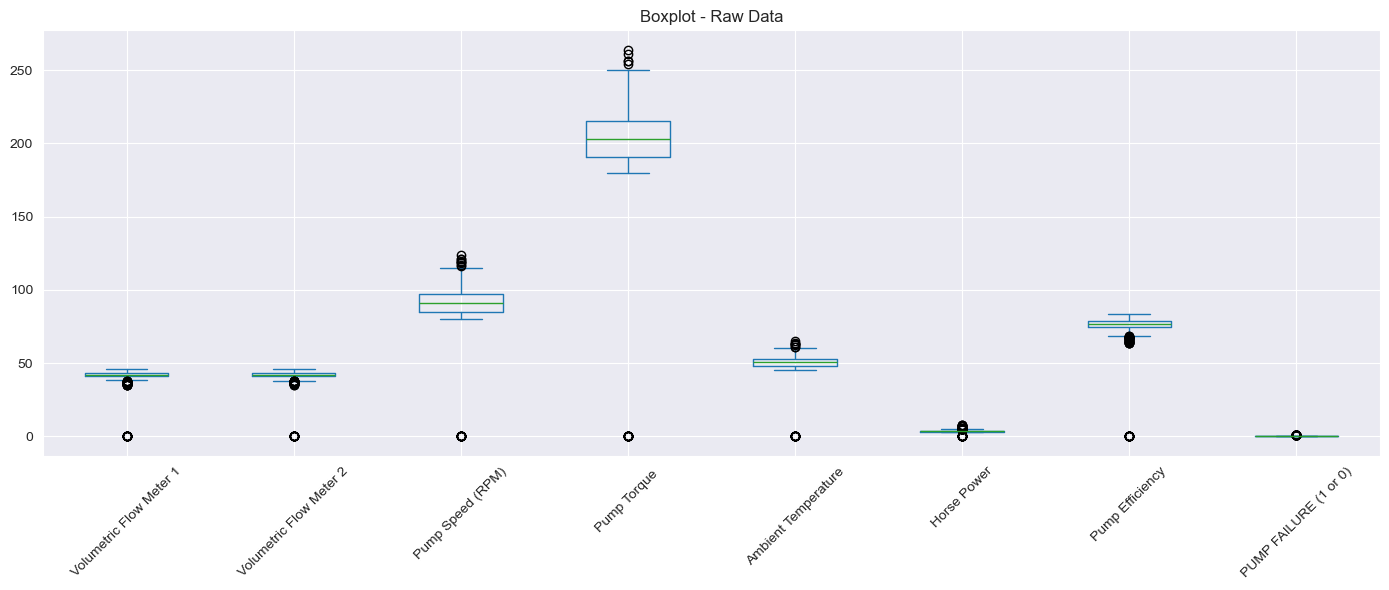

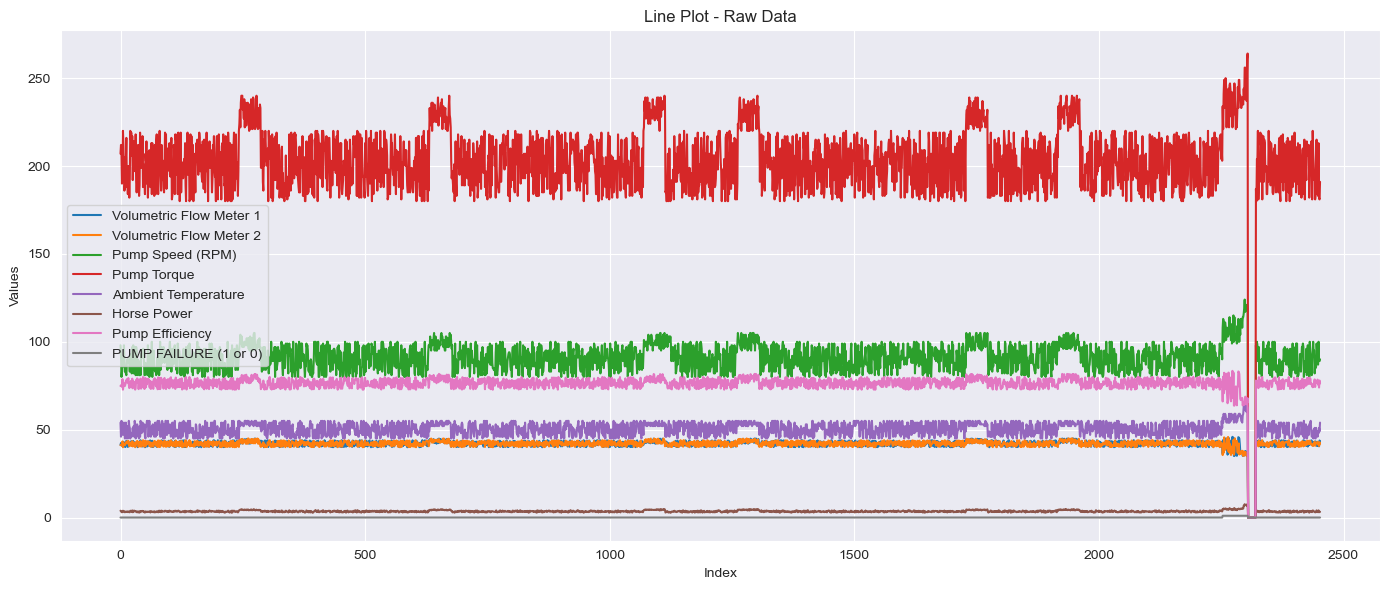

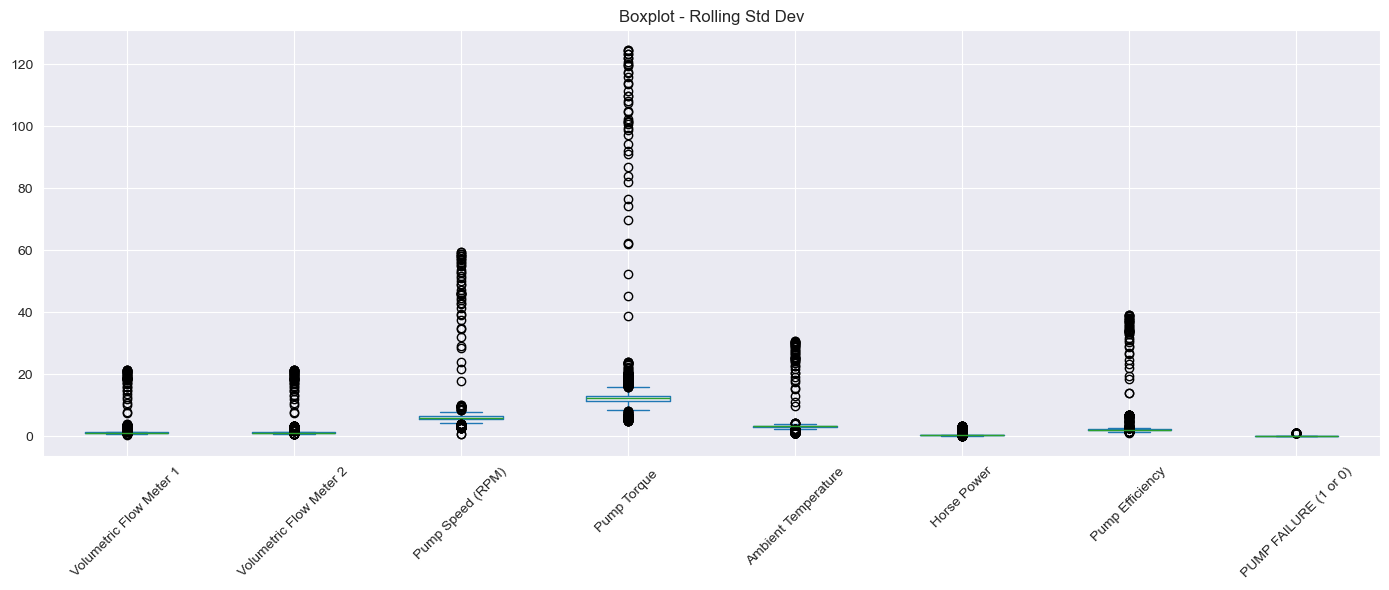

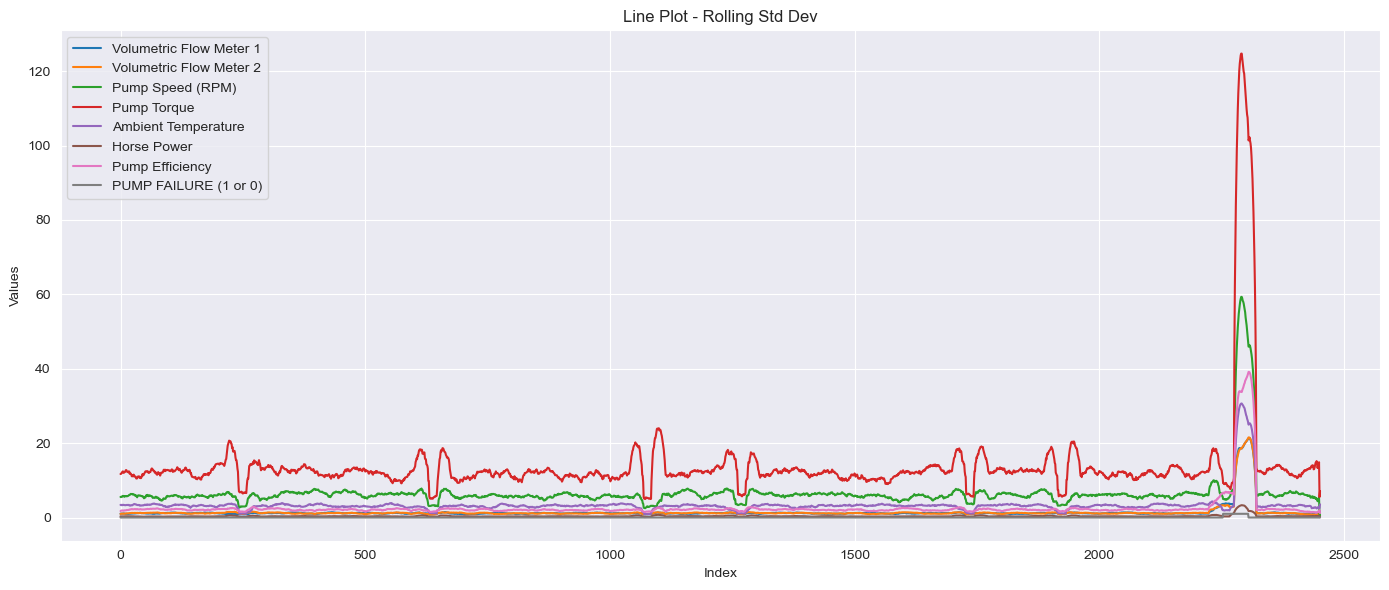

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe_raw = pd.read_csv('/Users/azebabrha/Downloads/DF_Raw_Data.csv')
dataframe_stdev = pd.read_csv('/Users/azebabrha/Downloads/DF_Rolling_Stdev.csv')

plt.rcParams["figure.figsize"] = (14, 6)

dataframe_raw.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)'], axis=1).plot(kind='box', title='Boxplot - Raw Data')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

dataframe_raw.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)'], axis=1).plot(title='Line Plot - Raw Data')
plt.xlabel("Index")
plt.ylabel("Values")
plt.grid(True)
plt.tight_layout()
plt.show()

dataframe_stdev.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)'], axis=1).plot(kind='box', title='Boxplot - Rolling Std Dev')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

dataframe_stdev.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)'], axis=1).plot(title='Line Plot - Rolling Std Dev')
plt.xlabel("Index")
plt.ylabel("Values")
plt.grid(True)
plt.tight_layout()
plt.show()


**Observation**

In [ ]:
The dataframe_raw plots show the normal operating levels of the pump system, with generally stable behavior. 
The dataframe_stdev plots reveal the fluctuations in those readings,
where sharp increases in variability can act as early warning signs for pump failures or anomalous events.

---------------------------------------------------------------------------

### <span style="color:green">Filtered Dataframes with Box Plots</span> 

Pump Failure (1 or 0) 
    
It is very likely we will see differences in the overall populations of Pre-Failure vs. Post Failure.

    


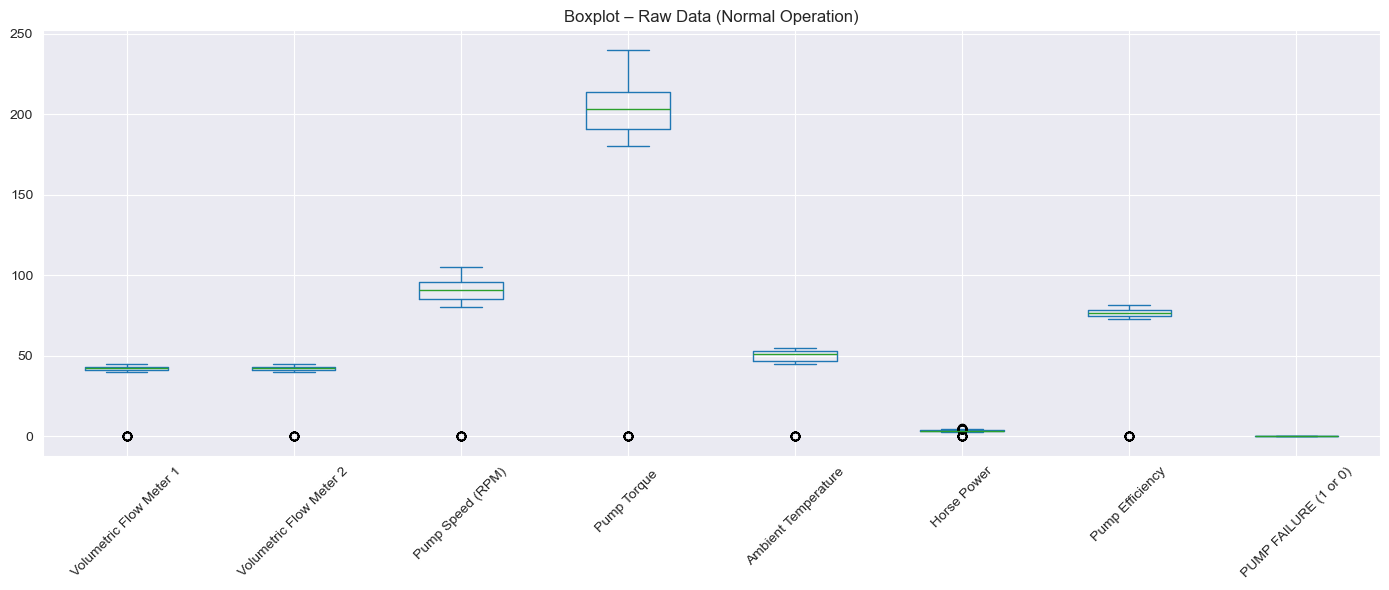

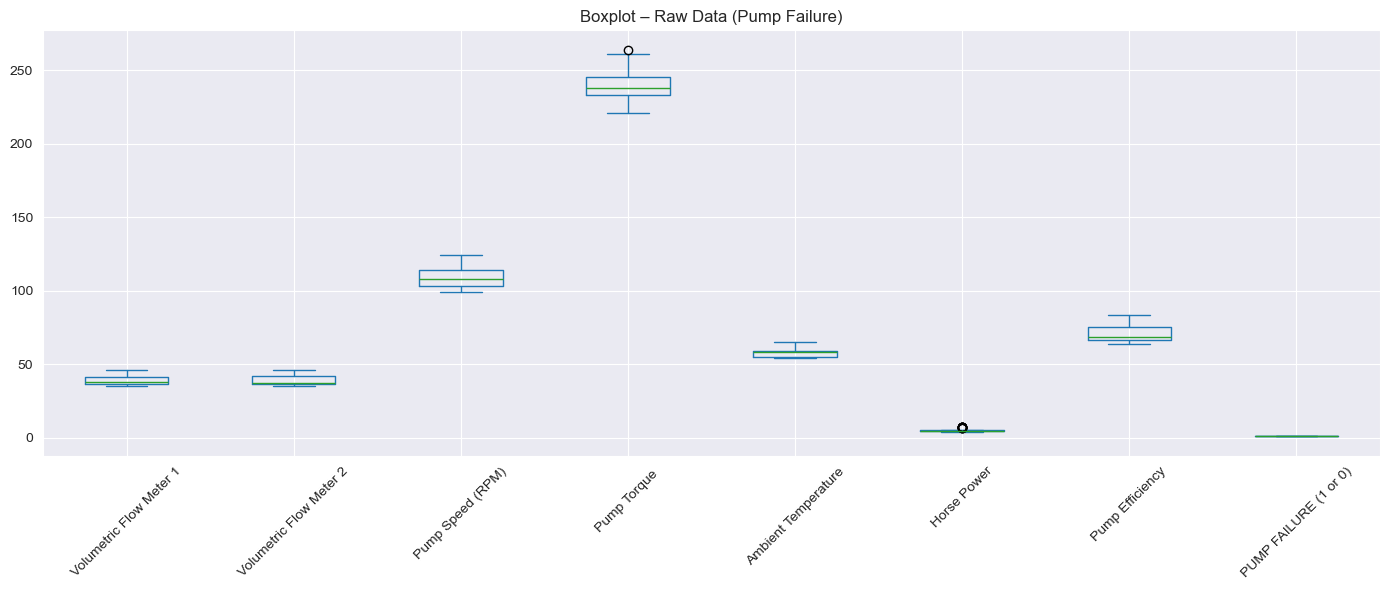

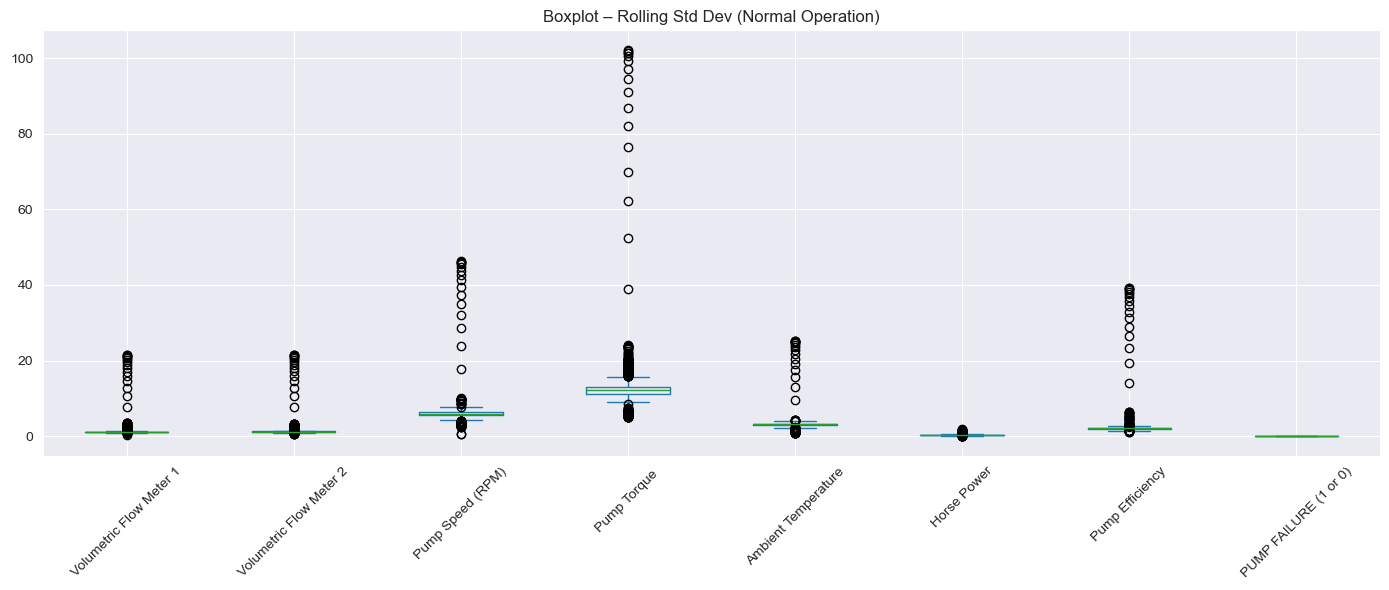

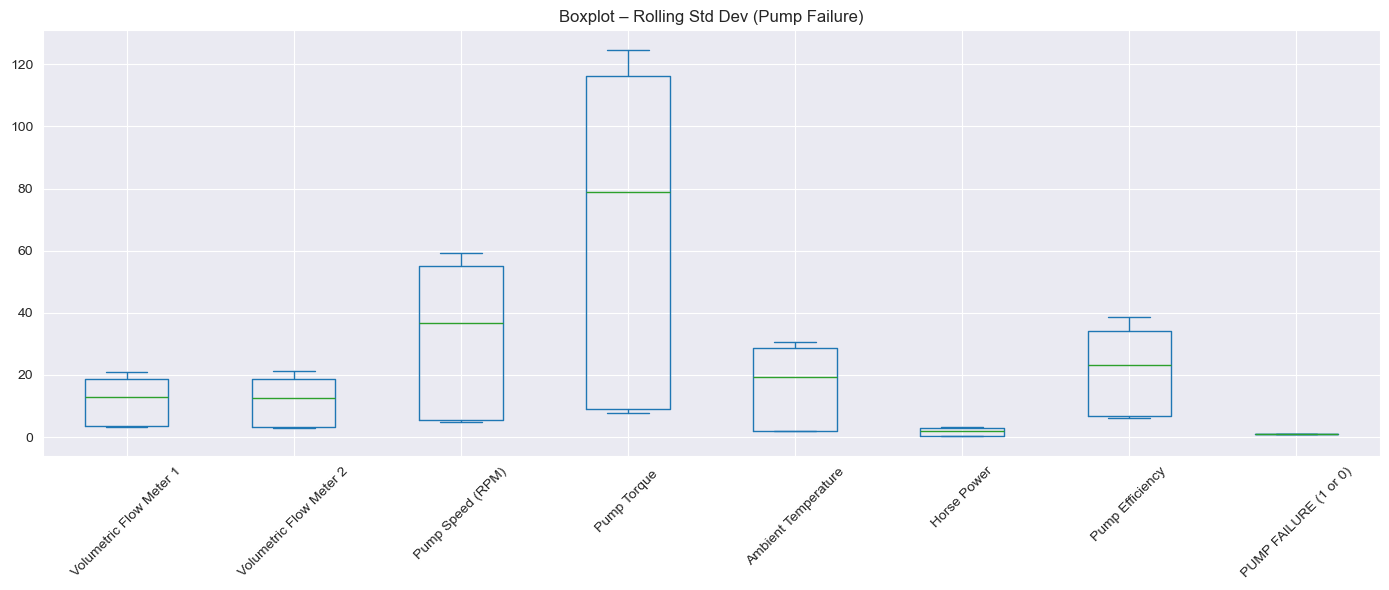

In [110]:


dataframe_raw = pd.read_csv('/Users/azebabrha/Downloads/DF_Raw_Data.csv')
dataframe_stdev = pd.read_csv('/Users/azebabrha/Downloads/DF_Rolling_Stdev.csv')

raw_normal = dataframe_raw[dataframe_raw['PUMP FAILURE (1 or 0)'] == 0]
raw_failure = dataframe_raw[dataframe_raw['PUMP FAILURE (1 or 0)'] == 1]

stdev_normal = dataframe_stdev[dataframe_stdev['PUMP FAILURE (1 or 0)'] == 0]
stdev_failure = dataframe_stdev[dataframe_stdev['PUMP FAILURE (1 or 0)'] == 1]

drop_cols = ['Data Source', 'TIMEFRAME (DD/MM/YYYY)']

raw_normal.drop(columns=drop_cols).plot(kind='box', title='Boxplot – Raw Data (Normal Operation)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

raw_failure.drop(columns=drop_cols).plot(kind='box', title='Boxplot – Raw Data (Pump Failure)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

stdev_normal.drop(columns=drop_cols).plot(kind='box', title='Boxplot – Rolling Std Dev (Normal Operation)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

stdev_failure.drop(columns=drop_cols).plot(kind='box', title='Boxplot – Rolling Std Dev (Pump Failure)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


---------------------------------------------------------------------------

### <span style="color:green"> Quartiles</span> 


i) Q1 should contain the <b> 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile </b> for all the columns in the dataframe.

ii) After  Q1 and Q3,  the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe 



In [69]:

# Load the dataset if not already loaded
dataframe_raw = pd.read_csv('/Users/azebabrha/Downloads/DF_Raw_Data.csv')

# Drop non-numeric columns
numeric_data = dataframe_raw.drop(columns=['Data Source', 'TIMEFRAME (DD/MM/YYYY)'])

# i) Calculate Q1 and Q3
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# ii) Calculate IQR
IQR = Q3 - Q1

# Print results
print("=== 25th Percentile (Q1) ===\n", Q1)
print("\n=== 75th Percentile (Q3) ===\n", Q3)
print("\n=== Interquartile Range (IQR) ===\n", IQR)


=== 25th Percentile (Q1) ===
 Volumetric Flow Meter 1     41.05
Volumetric Flow Meter 2     41.00
Pump Speed (RPM)            85.00
Pump Torque                191.00
Ambient Temperature         48.00
Horse Power                  3.22
Pump Efficiency             74.56
PUMP FAILURE (1 or 0)        0.00
Name: 0.25, dtype: float64

=== 75th Percentile (Q3) ===
 Volumetric Flow Meter 1     43.14
Volumetric Flow Meter 2     43.13
Pump Speed (RPM)            97.00
Pump Torque                215.00
Ambient Temperature         53.00
Horse Power                  3.78
Pump Efficiency             78.47
PUMP FAILURE (1 or 0)        0.00
Name: 0.75, dtype: float64

=== Interquartile Range (IQR) ===
 Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


---------------------------------------------------------------------------

### <span style="color:green">Identify Outliers</span> 
<b> Number of Outliers ?<B>

<b> Outlier = Q1 - 1.5x IQR OR Q3 + 1.5x IQR </b>

<b>  What is the percentage of data that remains after we've removed the Outliers from the dataframe_raw dataset?</b>
    

In [91]:
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR

Outliers = dataframe_raw[((numeric_data < Lower_Limit) | (numeric_data > Upper_Limit)).any(axis=1)]

num_outliers = Outliers.shape[0]
print(f"📌 Number of outliers: {num_outliers}")
total_rows = dataframe_raw.shape[0]
remaining_rows = total_rows - num_outliers
percentage_remaining = (remaining_rows / total_rows) * 100

print(f"Percentage of data remaining after removing outliers: {percentage_remaining:.2f}%")



📌 Number of outliers: 95
Percentage of data remaining after removing outliers: 96.13%


---------------------------------------------------------------------------


### <span style="color:green">Boxplot without Outliers</span> 


     A boxplot when PUMP FAILURE is 1 (Failure) </li>
     A boxplot when PUMP FAILURE is 0 (Normal Behaviour) </li> 




No data left for PUMP FAILURE = 1 after outlier removal.


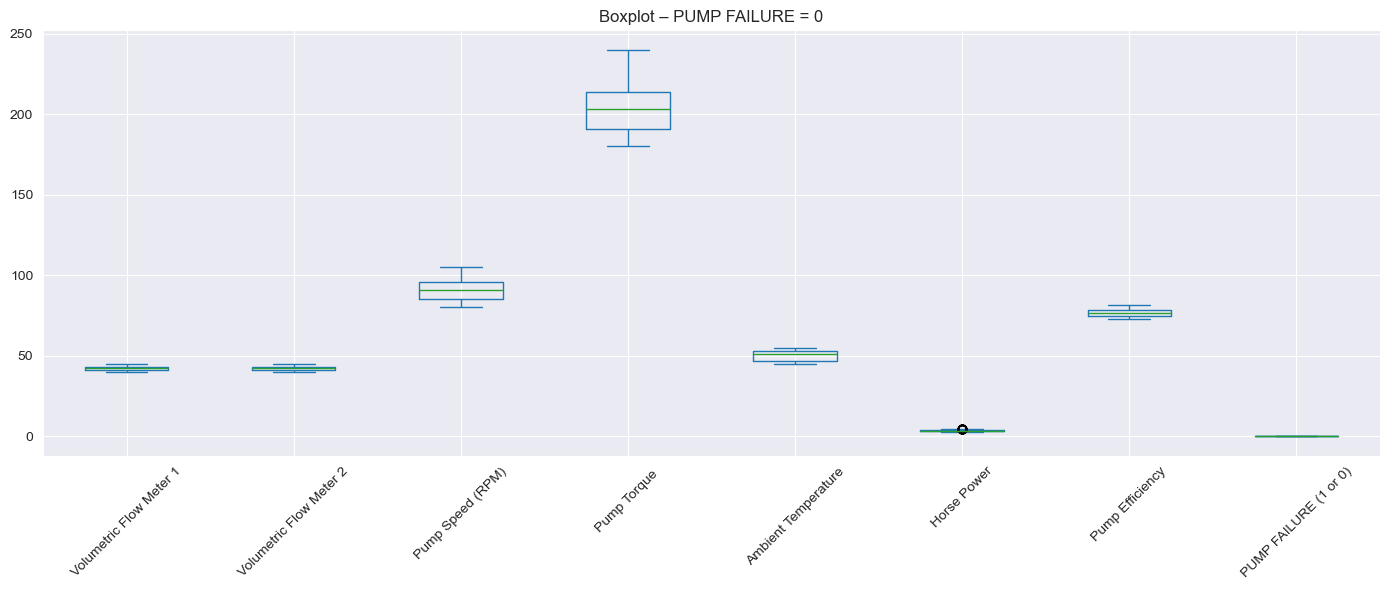

In [114]:

fail = no_outliers[no_outliers['PUMP FAILURE (1 or 0)'] == 1].drop(columns=['Data Source', 'TIMEFRAME (DD/MM/YYYY)'])
if not fail.empty:
    fail.plot(kind='box', title='Boxplot – PUMP FAILURE = 1')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data left for PUMP FAILURE = 1 after outlier removal.")

normal = no_outliers[no_outliers['PUMP FAILURE (1 or 0)'] == 0].drop(columns=['Data Source', 'TIMEFRAME (DD/MM/YYYY)'])
normal.plot(kind='box', title='Boxplot – PUMP FAILURE = 0')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### <span style="color:green">Plot and Examine Each Column</span> 



      
<b>looping through the dataframe_raw dataset, plotting every variable individually, against the Pump Failure to better identify trends. </b>


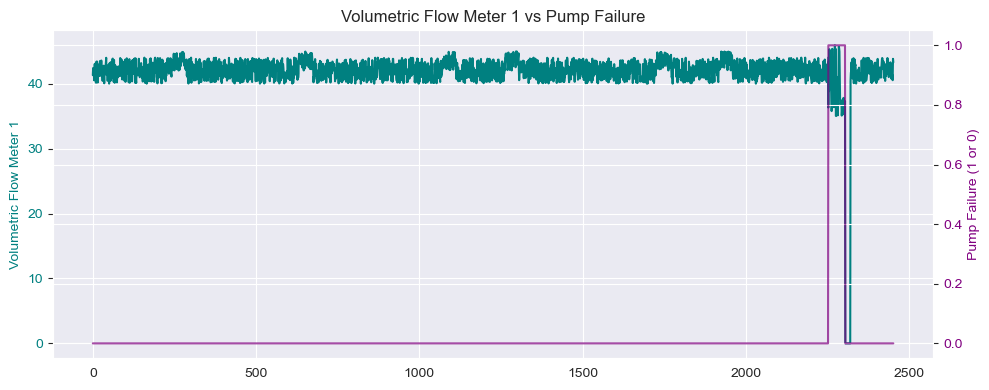

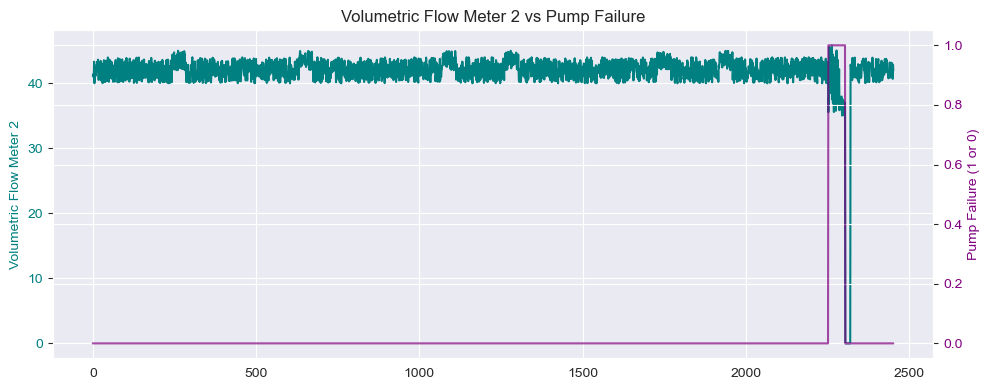

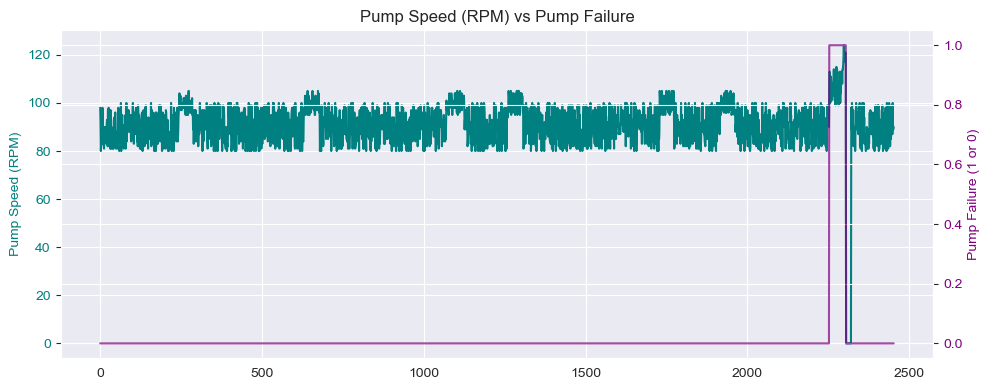

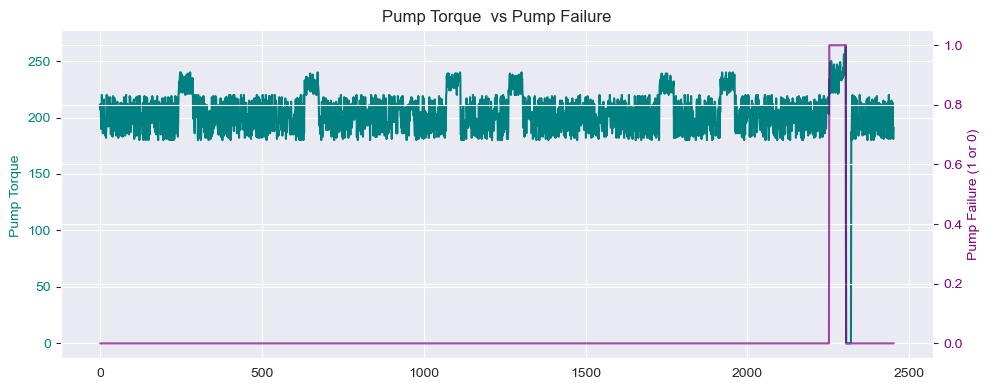

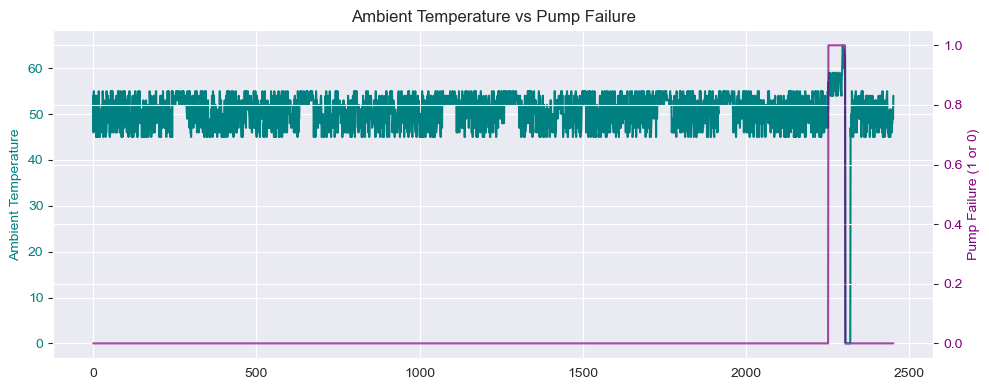

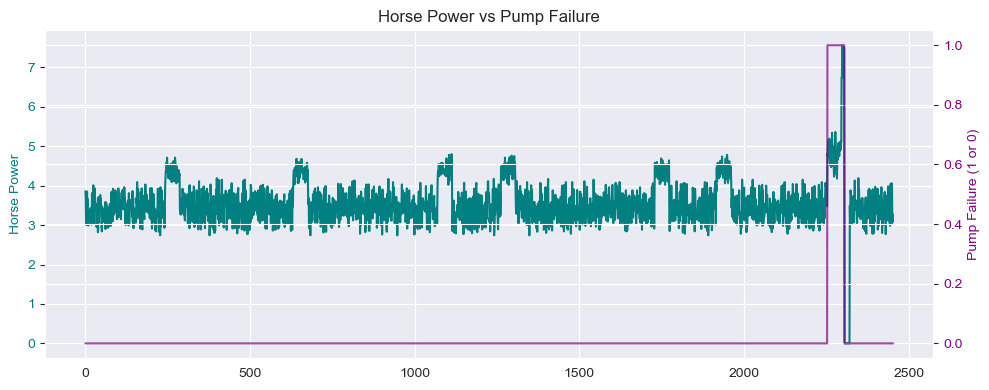

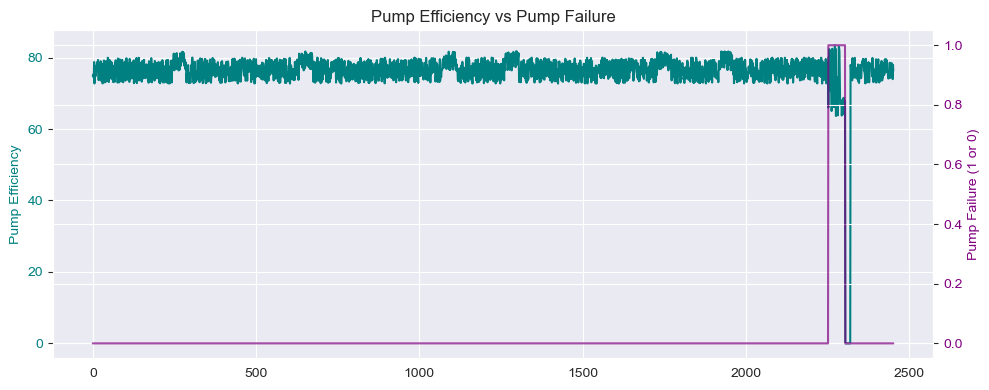

In [182]:
import matplotlib.pyplot as plt

# Step 1: Create a list of numeric columns excluding the target
ListOfVariables = dataframe_raw.select_dtypes(include='number').columns.drop('PUMP FAILURE (1 or 0)')

# Step 2: Iterate and create dual-axis plots
for item in ListOfVariables:
    fig, ax1 = plt.subplots(figsize=(10, 4))
    
    # Plot feature on left Y-axis
    ax1.plot(dataframe_raw[item], label=item, color='teal')
    ax1.set_ylabel(item, color='teal')
    ax1.tick_params(axis='y', labelcolor='teal')

    # Create right Y-axis and plot PUMP FAILURE
    ax2 = ax1.twinx()
    ax2.plot(dataframe_raw['PUMP FAILURE (1 or 0)'], label='Pump Failure', color='purple', alpha=0.7)
    ax2.set_ylabel('Pump Failure (1 or 0)', color='purple')
    ax2.tick_params(axis='y', labelcolor='purple')

    plt.title(f'{item} vs Pump Failure')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


---


###  <span style="color:green">Plot for Pump Failures Over a Rolling Time Period</span> 



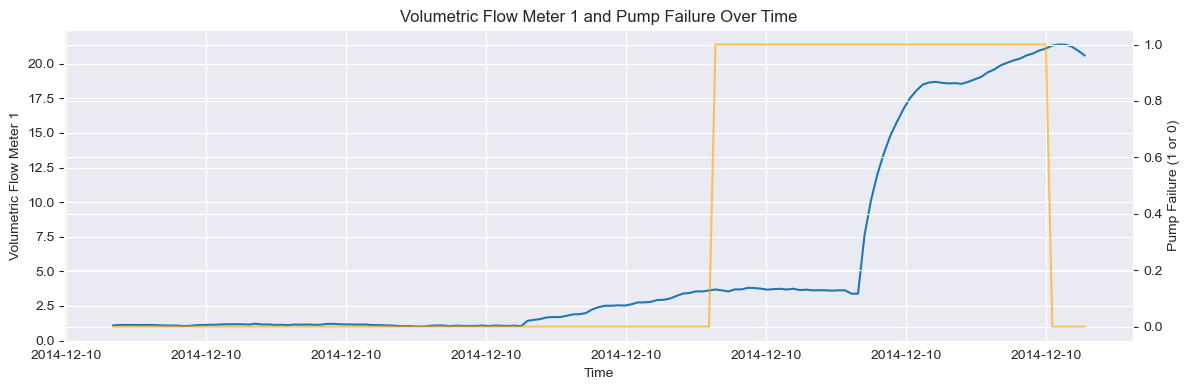

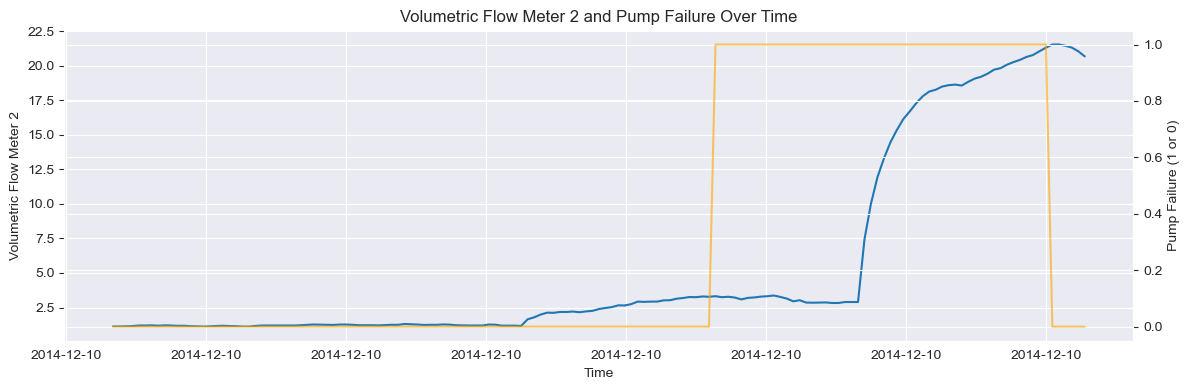

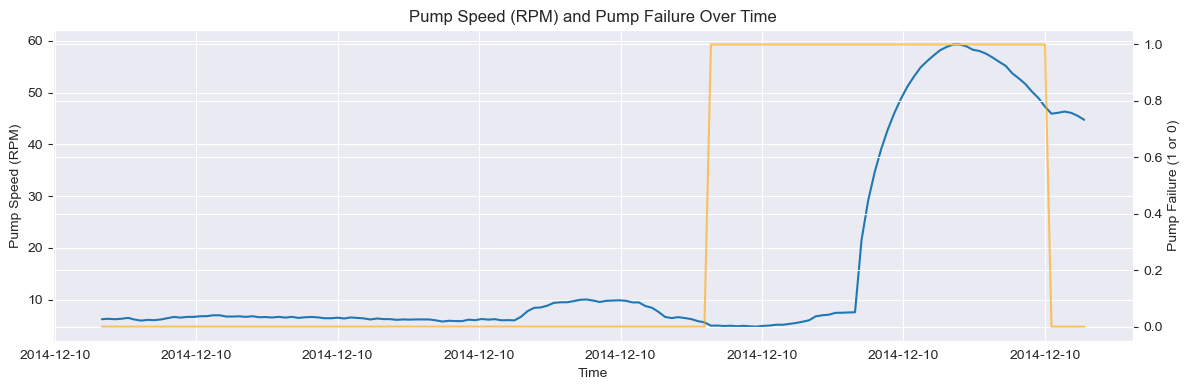

KeyError: 'Pump Torque'

In [208]:
import matplotlib.pyplot as plt

# Make sure your dataframe_stdev index is set to datetime and filtered for the time range
dataframe_time_filtered = dataframe_stdev[
    (dataframe_stdev.index >= "2014-12-10 12:00") & 
    (dataframe_stdev.index <= "2014-12-10 14:30")
]

# List of numerical variables to plot
ListOfVariables = [
    'Volumetric Flow Meter 1', 'Volumetric Flow Meter 2',
    'Pump Speed (RPM)', 'Pump Torque', 'Ambient Temperature',
    'Horse Power', 'Pump Efficiency'
]

# Plot each variable with Pump Failure as a secondary y-axis
for item in ListOfVariables:
    fig, ax1 = plt.subplots(figsize=(12, 4))

    # Plot the variable on the primary axis
    ax1.plot(dataframe_time_filtered.index, dataframe_time_filtered[item], label=item)
    ax1.set_ylabel(item)
    ax1.set_xlabel('Time')
    ax1.xaxis.set_major_locator(plt.MaxNLocator(10))  # Max 10 time stamps

    # Create secondary axis for Pump Failure
    ax2 = ax1.twinx()
    ax2.plot(dataframe_time_filtered.index, dataframe_time_filtered['PUMP FAILURE (1 or 0)'],
             color='orange', label='Pump Failure', alpha=0.6)
    ax2.set_ylabel('Pump Failure (1 or 0)')
    ax2.xaxis.set_major_locator(plt.MaxNLocator(10))

    plt.title(f"{item} and Pump Failure Over Time")
    fig.tight_layout()
    plt.show()


---

# <span style="color:green">Inferential Statistical Analysis</span>

###  <span style="color:purple"> correlations using Heatmap</span> 
 the correlations (R) for all variables using the dataframe_raw dataset.


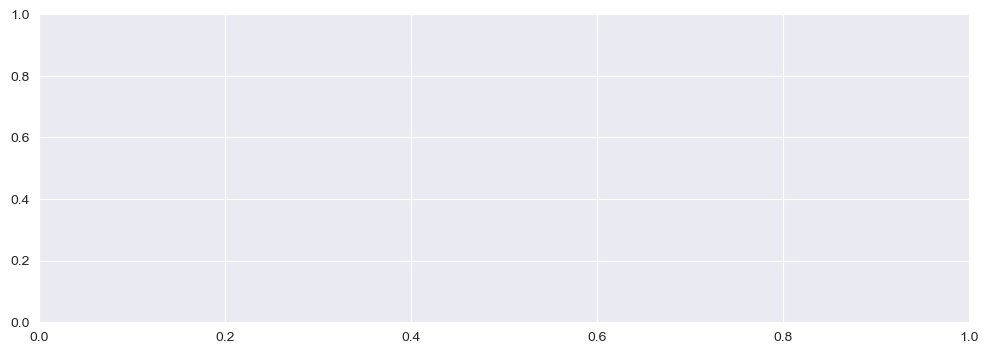

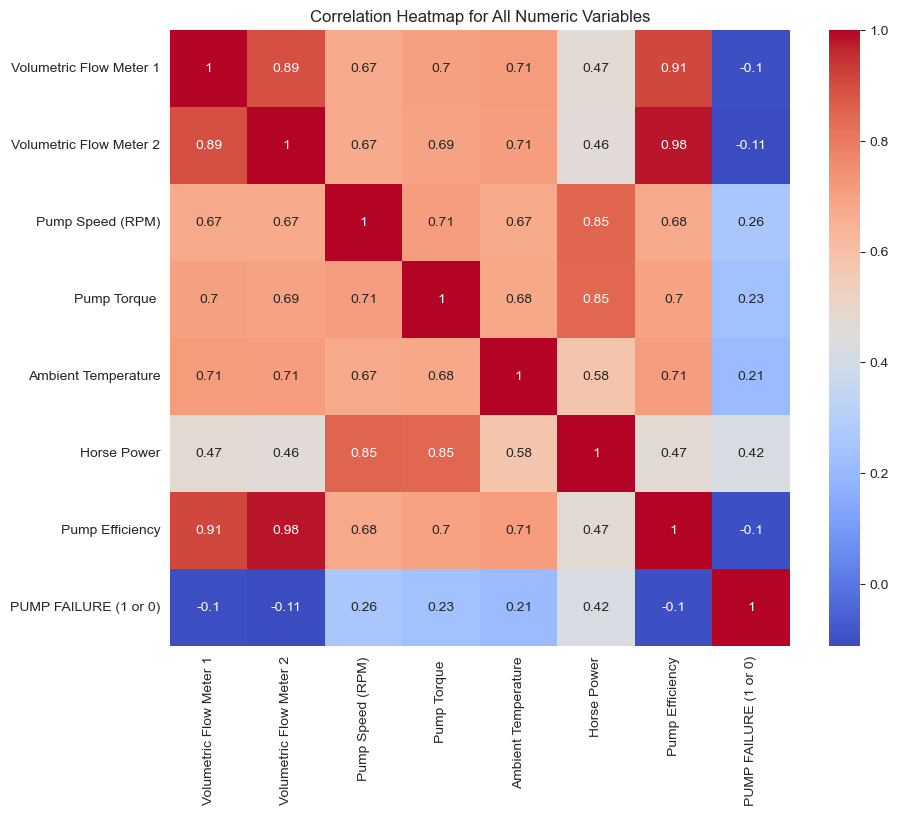

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = dataframe_raw.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for All Numeric Variables")
plt.show()


**Which variables seem to correlate with Pump Failure?**



### <span style="color:purple">Barplot of Correlated Features</span>



,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
Volumetric Flow Meter 1,1.000000,0.893058,0.674691,0.700425,0.713913,0.470081,0.913014,-0.102508
Volumetric Flow Meter 2,0.893058,1.000000,0.671896,0.692183,0.710423,0.462087,0.980144,-0.112115
Pump Speed (RPM),0.674691,0.671896,1.000000,0.711037,0.674645,0.848416,0.677924,0.260016
Pump Torque,0.700425,0.692183,0.711037,1.000000,0.680159,0.847884,0.698527,0.233193
Ambient Temperature,0.713913,0.710423,0.674645,0.680159,1.000000,0.579374,0.712727,0.207946
Horse Power,0.470081,0.462087,0.848416,0.847884,0.579374,1.000000,0.471731,0.421694
Pump Efficiency,0.913014,0.980144,0.677924,0.698527,0.712727,0.471731,1.000000,-0.102696
PUMP FAILURE (1 or 0),-0.102508,-0.112115,0.260016,0.233193,0.207946,0.421694,-0.102696,1.000000


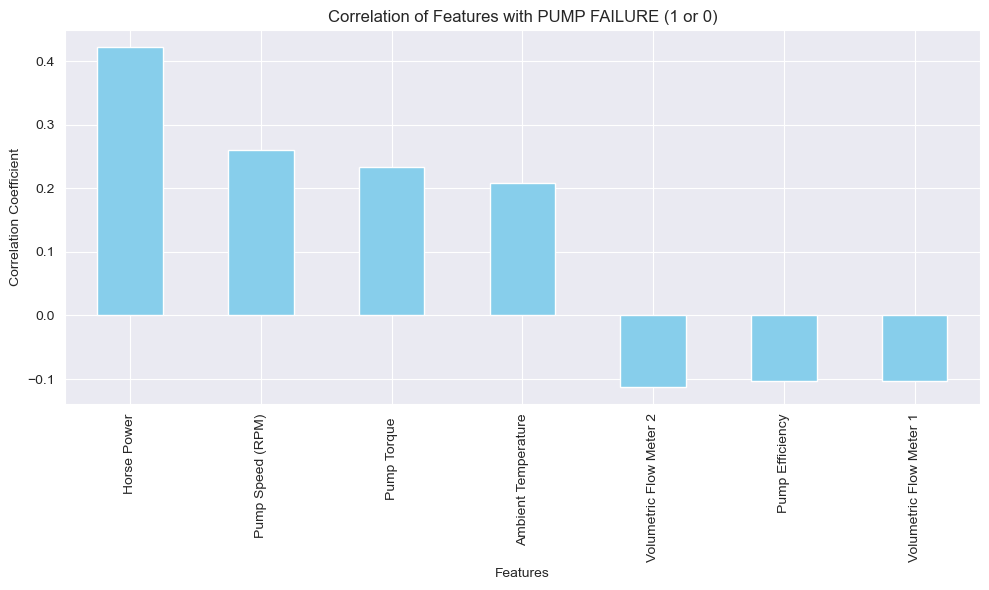

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

display(corr_matrix)

target_corr = corr_matrix['PUMP FAILURE (1 or 0)'].drop('PUMP FAILURE (1 or 0)')
sorted_corr = target_corr.reindex(target_corr.abs().sort_values(ascending=False).index)

sorted_corr.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Correlation of Features with PUMP FAILURE (1 or 0)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()


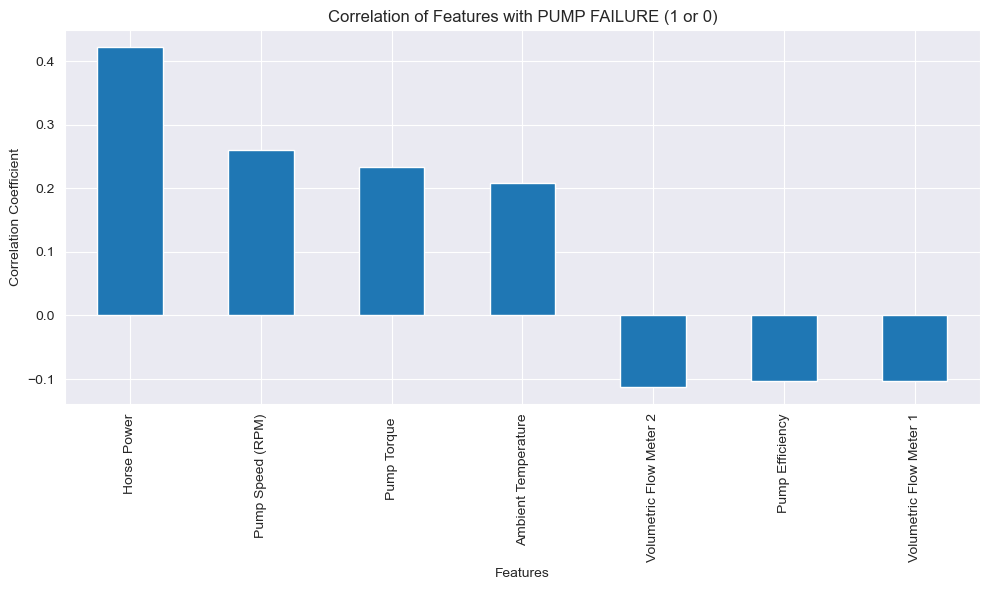

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include='number')

corr_matrix = numeric_df.corr()

corr_target = corr_matrix['PUMP FAILURE (1 or 0)'].drop('PUMP FAILURE (1 or 0)')

corr_sorted = corr_target.reindex(corr_target.abs().sort_values(ascending=False).index)

corr_sorted.plot(kind='bar', figsize=(10, 6))
plt.title('Correlation of Features with PUMP FAILURE (1 or 0)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()


---

###  <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 
Previously We saw *some* correlations with the raw data but they weren't necessarily as strong as we would have liked. This time, we'll recreate a Heatmap 


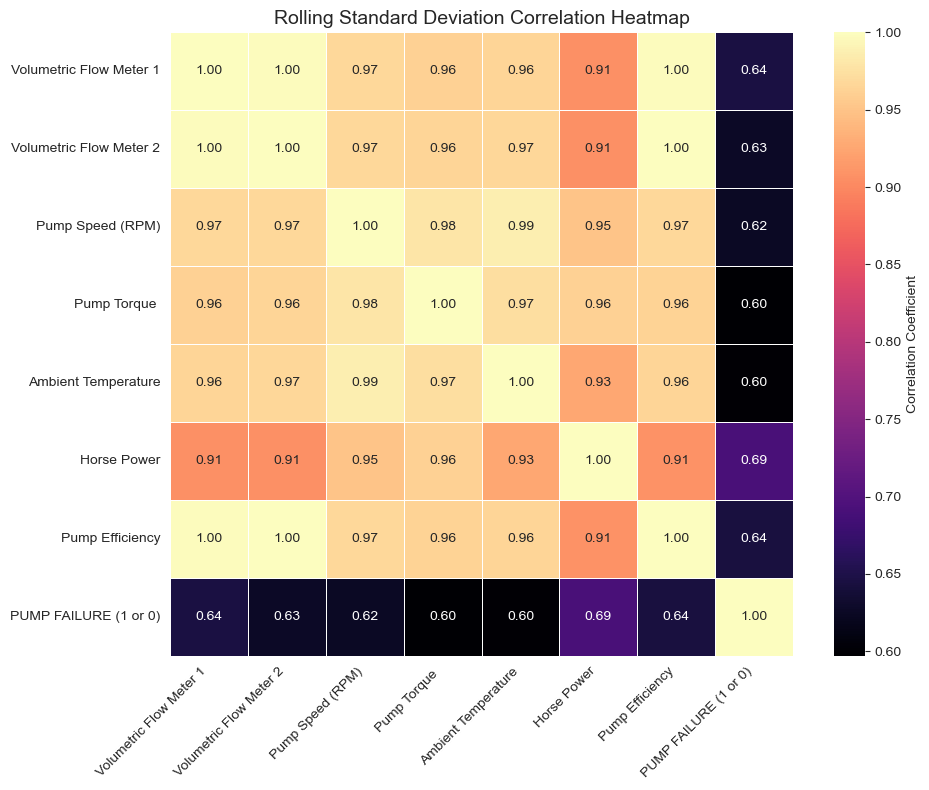

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Filter numeric columns only
numeric_df = dataframe_stdev.select_dtypes(include='number')

# Step 2: Compute correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f", square=True,
            linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Rolling Standard Deviation Correlation Heatmap', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
Yes, the following variables stand out as being the most correlated with `PUMP FAILURE (1 or 0)`:

- Horse Power (0.69)
- Pump Efficiency (0.64)
- Volumetric Flow Meter 1 (0.64)
- Volumetric Flow Meter 2 (0.63)

These variables show the strongest positive correlations and may be key indicators of failure conditions.

### Creating a Multivariate Regression Model


we'll be using the statsmodel.api library calling the Ordinary Least Squares Regression to create a multivariate regression model (which is a linear regression model with more than one independent variable).

### <span style="color:purple">OLS Regression</span> 







In [167]:
import statsmodels.api as sm

dependent_variable = dataframe_raw['PUMP FAILURE (1 or 0)']
independent_variables = dataframe_raw.drop(columns=['PUMP FAILURE (1 or 0)'])

independent_variables = independent_variables.select_dtypes(include='number')

independent_variables = sm.add_constant(independent_variables)

regression_model_raw = sm.OLS(dependent_variable, independent_variables).fit()

print(regression_model_raw.summary())


                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Wed, 28 May 2025   Prob (F-statistic):          5.58e-233
Time:                           11:24:25   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [173]:
dependent_variable_stdev = dataframe_stdev['PUMP FAILURE (1 or 0)']
independent_variables_stdev = dataframe_stdev.drop(columns=['PUMP FAILURE (1 or 0)'])

independent_variables_stdev = independent_variables_stdev.select_dtypes(include='number')

independent_variables_stdev = sm.add_constant(independent_variables_stdev)

regression_model_stdev = sm.OLS(dependent_variable_stdev, independent_variables_stdev).fit()

print(regression_model_stdev.summary())


                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                           11:25:45   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

### <span style="color:purple">Analysis of Coefficients </span>

 Which variables spike the most in relation to Pump Failure





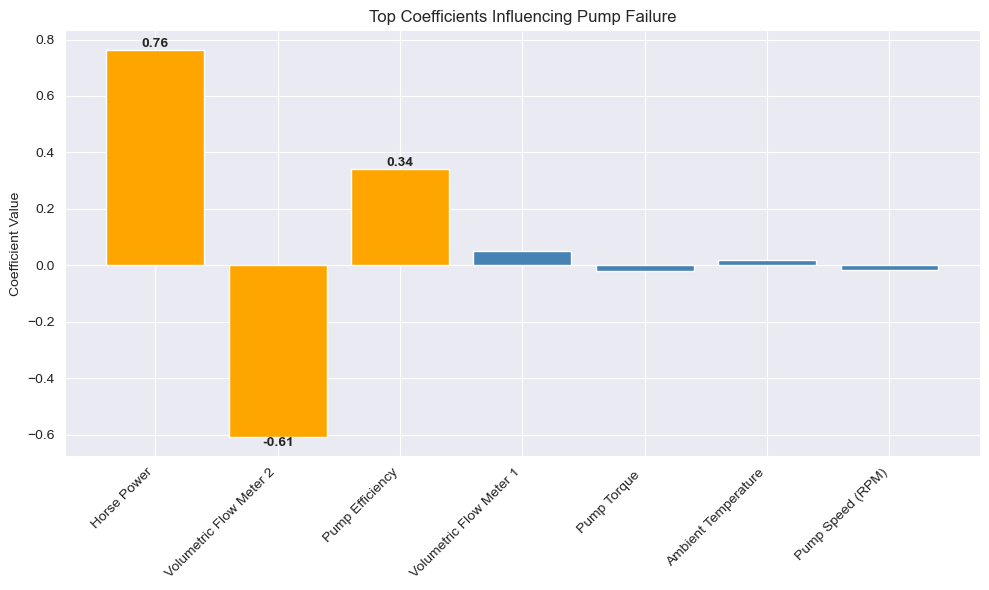

In [179]:
import matplotlib.pyplot as plt

# Step 1: Extract and clean coefficients
coefficients = regression_model_stdev.params.drop('const')  # Remove intercept

# Step 2: Sort by absolute value
coefficients_sorted = coefficients.reindex(coefficients.abs().sort_values(ascending=False).index)

# Step 3: Highlight top 3
top_3 = coefficients_sorted.head(3)

# Step 4: Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(coefficients_sorted.index, coefficients_sorted.values, color=['orange' if i in top_3.index else 'steelblue' for i in coefficients_sorted.index])

# Annotate top 3
for bar in bars:
    height = bar.get_height()
    if bar.get_x() + bar.get_width()/2 in [bars[list(coefficients_sorted.index).index(x)].get_x() + bars[0].get_width()/2 for x in top_3.index]:
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')

plt.title('Top Coefficients Influencing Pump Failure')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()



###  <span style="color:purple">Validate Predictions</span> 

it's time to <b> validate our predictions. </b>

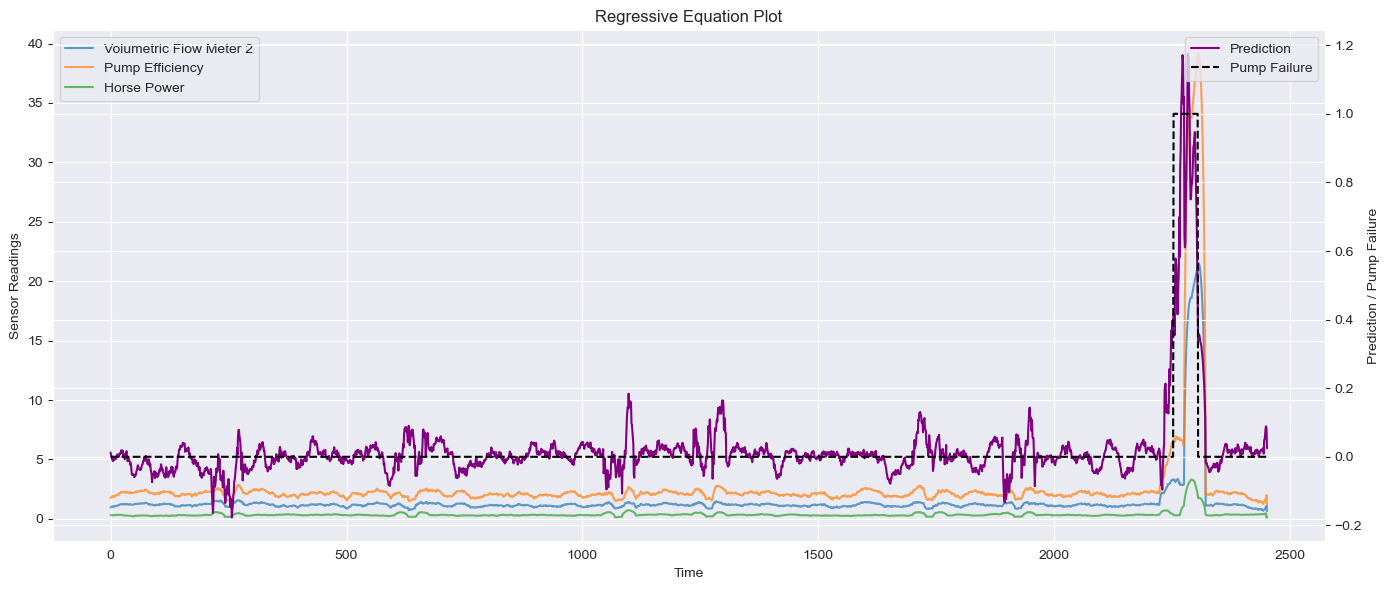

In [175]:
import matplotlib.pyplot as plt

# Step 1: Make predictions using the regression model
dataframe_stdev['Prediction'] = regression_model_stdev.predict(independent_variables_stdev)

# Step 2: Create dual-axis plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left Y-axis: Volumetric Flow Meter 2, Pump Efficiency, Horse Power
ax1.set_xlabel('Time')
ax1.set_ylabel('Sensor Readings')
ax1.plot(dataframe_stdev['Volumetric Flow Meter 2'], label='Volumetric Flow Meter 2', alpha=0.7)
ax1.plot(dataframe_stdev['Pump Efficiency'], label='Pump Efficiency', alpha=0.7)
ax1.plot(dataframe_stdev['Horse Power'], label='Horse Power', alpha=0.7)
ax1.legend(loc='upper left')
ax1.grid(True)

# Right Y-axis: Prediction and Actual
ax2 = ax1.twinx()
ax2.set_ylabel('Prediction / Pump Failure')
ax2.plot(dataframe_stdev['Prediction'], label='Prediction', color='purple')
ax2.plot(dataframe_stdev['PUMP FAILURE (1 or 0)'], label='Pump Failure', color='black', linestyle='--')
ax2.legend(loc='upper right')

# Final touches
plt.title('Regressive Equation Plot')
plt.tight_layout()
plt.show()
